<a href="https://colab.research.google.com/github/vmr1532/kaggle-projects/blob/master/mnistcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
if not os.path.exists(os.path.dirname(filename)):
  os.makedirs(os.path.dirname(filename))
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [2]:
!pip install kaggle


In [5]:
!kaggle competitions download -c digit-recognizer
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!kaggle competitions download -c digit-recognizer

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:


import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas
import numpy

In [0]:
import csv
import numpy
train1=pandas.read_csv("train.csv")
test1=pandas.read_csv("test.csv")

In [7]:
print(train1)


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11         9       0       0       0    

In [8]:
X = numpy.asarray(train1.drop('label',axis=1),dtype=numpy.float32).reshape(-1,28,28)
print(X)
yhat = numpy.asarray(train1['label'])
print(yhat)
# Generate random indices for creating a random validation set with 20% of the labelled data
validx = (numpy.random.uniform(size=len(X)) <= 0.2)

# Create training set (80% of the labelled data)
X_trn = X[~validx]
y_trn = yhat[~validx]

# Create validation set (20% of the labelled data)
X_val = X[validx]
y_val = yhat[validx]

# Create the test set
X_tes = numpy.asarray(test1,dtype=numpy.float32).reshape(-1,28,28)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[1 0 1 ...

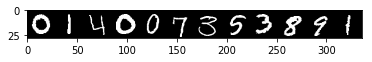

array([0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1])

In [9]:
nvis = 12
plt.imshow(numpy.concatenate(X_trn[:nvis],axis=1),cmap='gray',vmin=0,vmax=255)
plt.show()

# Print the corresponding labels to check they match
y_trn[:nvis]

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
import keras,numpy
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
model=Sequential()
model.add(Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
y=model.fit(numpy.expand_dims(X_trn,axis=3),keras.utils.to_categorical(y_trn, num_classes=10, dtype='int'), epochs=300, batch_size=128,verbose=1)

Epoch 1/300
33666/33666 [==============================] - 15s 456us/step - loss: 8.4546 - acc: 0.4691
Epoch 2/300
33666/33666 [==============================] - 15s 448us/step - loss: 7.1473 - acc: 0.5495
Epoch 3/300
33666/33666 [==============================] - 15s 446us/step - loss: 1.5882 - acc: 0.8754
Epoch 4/300
33666/33666 [==============================] - 15s 447us/step - loss: 0.1462 - acc: 0.9687
Epoch 5/300
33666/33666 [==============================] - 15s 444us/step - loss: 0.0752 - acc: 0.9794
Epoch 6/300
33666/33666 [==============================] - 15s 445us/step - loss: 0.0455 - acc: 0.9873
Epoch 7/300
33666/33666 [==============================] - 15s 448us/step - loss: 0.0284 - acc: 0.9918
Epoch 8/300
33666/33666 [==============================] - 15s 446us/step - loss: 0.0202 - acc: 0.9944
Epoch 9/300
33666/33666 [==============================] - 15s 443us/step - loss: 0.0137 - acc: 0.9965
Epoch 10/300
33666/33666 [==============================] - 15s 445us/ste

In [13]:
import numpy as np
predictions = model.predict(numpy.expand_dims(X_tes,axis=3))
output = np.argmax(predictions,axis=1)
print(output)

[2 0 9 ... 3 9 2]


In [0]:
sub = pandas.DataFrame({"ImageId":numpy.arange(1,28001),"Label":output})
sub.to_csv("sub.csv",index=False)

In [15]:
!kaggle competitions submit -c digit-recognizer -f sub.csv -m "submission2"

100% 208k/208k [00:00<00:00, 772kB/s]
Successfully submitted to Digit Recognizer